In [1]:
import numpy as np
import matplotlib.pyplot as plt

showing values of x :  [0.44458056 0.48337472 0.75589225 0.40563666 0.93817011 0.68156081
 0.02971276 0.08444494 0.47458665 0.41388697 0.59826569 0.13607315
 0.1000669  0.4629599  0.65878336 0.03998587 0.65394746 0.97760472
 0.69635495 0.1769558 ]


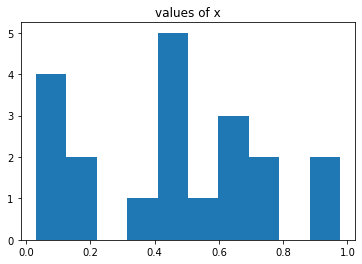

showing values of N :  [ 0.44349841 -0.507076   -0.30763293 -0.98410973  0.58969717 -1.347633
  1.03237418 -1.30472548  0.33244919 -0.72722029  0.12283441 -1.19301936
 -1.05293948  0.34501455 -0.48303383  0.67111298 -0.57775843 -0.68040563
 -0.57571651 -1.95494733]


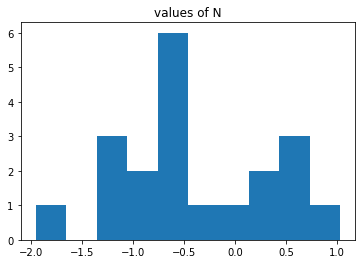

In [2]:
# rand = np.random.RandomState(20) 
x=np.random.uniform(0,1,20)
print('showing values of x : ',x)

plt.hist(x)
plt.title('values of x')
plt.show()

N=np.random.normal(size=20)
print('showing values of N : ',N)

plt.hist(N)
plt.title('values of N')
plt.show()


Values of y :  [0.42957553405617344, 0.002462997394387184, -1.0608183645982825, 0.3616743185964057, -0.26014321213851127, -1.1787169835841307, 0.39210679737896637, 0.24515070627155472, 0.22510723446087633, 0.36931531995544187, -0.5547651526654118, 0.516021951366568, 0.3776033137595529, 0.2992704659221117, -0.9371049288997655, 0.3828580486930958, -0.9391992070549361, -0.275542309835569, -1.0590612282059162, 0.5055924383654123]


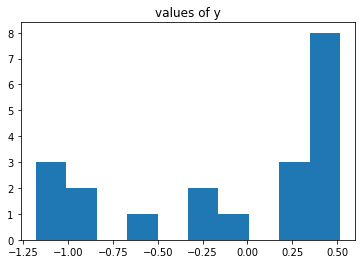

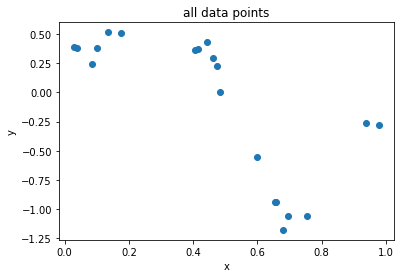

In [48]:
import math
y=[]
for i in range(20):
  # print(i)
  y.append((math.sin(x[i]*3.142*2))+(N[i])*0.2)
print('Values of y : ',y)

plt.hist(y)
plt.title('values of y')
plt.show()

plt.scatter(x,y)
plt.title('all data points')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [49]:
train_y=[]
test_y=[]
train_x=[]
test_x=[]
for i in range(20):
  if(i%2==0):
    train_y.append(y[i])
    train_x.append(x[i])
  else:
    test_y.append(y[i])
    test_x.append(x[i])

print("training set for y : ",train_y)
print("training set for x : ",train_x)
print("test set for y : ",test_y)
print("test set for x : ",test_x)

train_y=np.array(train_y)
test_y=np.array(test_y)
train_x=np.array(train_x)
test_x=np.array(test_x)

train_x=train_x.reshape(-1, 1)
train_y=train_y.reshape(-1, 1)
test_x=test_x.reshape(-1,1)
test_y=test_y.reshape(-1,1)


# plt.scatter(x,train_y)
# plt.title('Training data points')
# plt.xlabel('x')
# plt.ylabel('y')
# plt.show()

# plt.scatter(x,test_set)
# plt.title('Training data points')
# plt.xlabel('x')
# plt.ylabel('y')
# plt.show()



training set for y :  [0.42957553405617344, -1.0608183645982825, -0.26014321213851127, 0.39210679737896637, 0.22510723446087633, -0.5547651526654118, 0.3776033137595529, -0.9371049288997655, -0.9391992070549361, -1.0590612282059162]
training set for x :  [0.4445805638506861, 0.7558922460195984, 0.938170110820013, 0.029712756683638486, 0.4745866471056126, 0.5982656921222717, 0.10006690204306057, 0.6587833632122513, 0.6539474557965732, 0.6963549536809621]
test set for y :  [0.002462997394387184, 0.3616743185964057, -1.1787169835841307, 0.24515070627155472, 0.36931531995544187, 0.516021951366568, 0.2992704659221117, 0.3828580486930958, -0.275542309835569, 0.5055924383654123]
test set for x :  [0.48337471748526306, 0.40563665969002094, 0.6815608141105605, 0.0844449427302495, 0.4138869654040448, 0.1360731501774779, 0.462959903739686, 0.039985870985992156, 0.9776047177550461, 0.17695580239174558]


In [50]:
from sklearn.preprocessing import PolynomialFeatures
# from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [51]:
# train_x=np.array(train_x)
# train_y=np.array(train_y)
# train_x.reshape(-1)
# train_y.reshape(-1)
# polyreg=make_pipeline(PolynomialFeatures(9),LinearRegression())
# polyreg.fit(train_x,train_y)


# reference : https://moonbooks.org/Articles/How-to-implement-a-polynomial-linear-regression-using-scikit-learn-and-python-3-/
def Regression(i):
    polynomial_features = PolynomialFeatures(degree = i)
    x_transf=polynomial_features.fit_transform(train_x)
    
    model=LinearRegression()
    model.fit(x_transf,train_y)

    y_new=model.predict(x_transf)

    #training error
    rmse=np.sqrt(mean_squared_error(train_y,y_new))
    #test error
    rmse2=np.sqrt(mean_squared_error(test_y,y_new))
    
    r2=r2_score(test_y,y_new)
    
    print('RMSE of degree ',i,': ',rmse2)
    print('R2 of degree ',i,': ',r2)

    return polynomial_features, model





In [56]:
polynomial0, model0 = Regression(0)
weights0=model0.coef_ #https://stackoverflow.com/questions/47303261/getting-weights-of-features-using-scikit-learn-logistic-regression
w0=weights0.copy()
w0.resize(10,refcheck=False) #https://stackoverflow.com/questions/38191855/zero-pad-numpy-array
print('weights for degree 0: ',w0)

polynomial1, model1 = Regression(1)
weights1=model1.coef_  
w1=weights1.copy()
w1.resize(10,refcheck=False)
print('weights for degree 1: ',w1)

polynomial3, model3 = Regression(3)
weights3=model3.coef_
w3=weights3.copy()
w3.resize(10,refcheck=False)
print('weights for degree 3: ',w3)

polynomial9, model9 = Regression(9)
weights9=model9.coef_
w9=weights9.copy()
w9.resize(10,refcheck=False)
print('weights for degree 9: ',w9)


RMSE of degree  0 :  0.6730122726137248
R2 of degree  0 :  -0.8874066449419691
weights for degree 0:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
RMSE of degree  1 :  0.685202431842373
R2 of degree  1 :  -0.9563984199451707
weights for degree 1:  [ 0.         -1.63318837  0.          0.          0.          0.
  0.          0.          0.          0.        ]
RMSE of degree  3 :  0.9206049785324874
R2 of degree  3 :  -2.5315564326817497
weights for degree 3:  [  0.          13.09652022 -38.60901703  26.16121597   0.
   0.           0.           0.           0.           0.        ]
RMSE of degree  9 :  0.9421085529554575
R2 of degree  9 :  -2.698464080930323
weights for degree 9:  [ 0.00000000e+00 -4.06328130e+04  6.54904617e+05 -4.69099621e+06
  1.84322323e+07 -4.35460560e+07  6.37286368e+07 -5.67057034e+07
  2.81530801e+07 -5.98715110e+06]


In [58]:
# https://www.geeksforgeeks.org/creating-tables-with-prettytable-library-python/

from prettytable import PrettyTable

mytable=PrettyTable()

columns=['','Order 0','Order 1','Order 3','Order 9']

mytable.add_column(columns[0],['W0','W1','W2','W3','W4','W5','W6','W7','W8','W9'])
mytable.add_column(columns[1],w0)
mytable.add_column(columns[2],w1)
mytable.add_column(columns[3],w3)
mytable.add_column(columns[4],w9)

print(mytable)

+----+---------+---------------------+--------------------+---------------------+
|    | Order 0 |       Order 1       |      Order 3       |       Order 9       |
+----+---------+---------------------+--------------------+---------------------+
| W0 |   0.0   |         0.0         |        0.0         |         0.0         |
| W1 |   0.0   | -1.6331883656882527 | 13.096520221169634 |  -40632.81298209521 |
| W2 |   0.0   |         0.0         | -38.60901702761481 |  654904.6167027741  |
| W3 |   0.0   |         0.0         | 26.161215969029215 | -4690996.2079880135 |
| W4 |   0.0   |         0.0         |        0.0         |  18432232.29890895  |
| W5 |   0.0   |         0.0         |        0.0         | -43546055.950364575 |
| W6 |   0.0   |         0.0         |        0.0         |  63728636.830020435 |
| W7 |   0.0   |         0.0         |        0.0         | -56705703.395017125 |
| W8 |   0.0   |         0.0         |        0.0         |  28153080.084139224 |
| W9 |   0.0   |

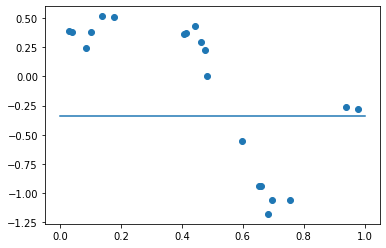

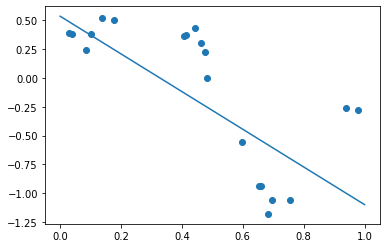

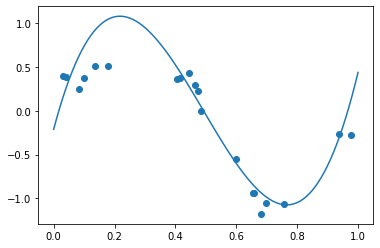

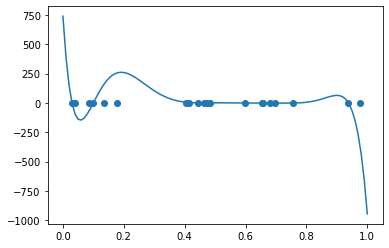

In [54]:
xnew=np.linspace(0,1,100)
xnew=np.array(xnew)
xnew=xnew.reshape(-1,1)
x_trans0=polynomial0.fit_transform(xnew)
y0=model0.predict(x_trans0)
plt.scatter(x,y)
plt.plot(xnew,y0)
plt.show()


x_trans1=polynomial1.fit_transform(xnew)
y1=model1.predict(x_trans1)
plt.scatter(x,y)
plt.plot(xnew,y1)
plt.show()

x_trans3=polynomial3.fit_transform(xnew)
y3=model3.predict(x_trans3)
plt.scatter(x,y)
plt.plot(xnew,y3)
plt.show()

x_trans9=polynomial9.fit_transform(xnew)
y9=model9.predict(x_trans9)
plt.scatter(x,y)
plt.plot(xnew,y9)
plt.show()


[0.6137762788283471, 0.427512293562123, 0.419419767685851, 0.15951105145472547, 0.0832352642751276, 0.02399299567774894, 0.017263353361765873, 0.013107346813858856, 0.00562894170505559, 4.916311737495675e-09]
[0.6730122726137248, 0.44201316118634526, 0.4480009146104524, 0.29848053586805784, 0.2708146137857355, 0.16717524959106064, 0.16299641282020896, 0.6340641184862053, 3.399538424792791, 161.22217451679396]


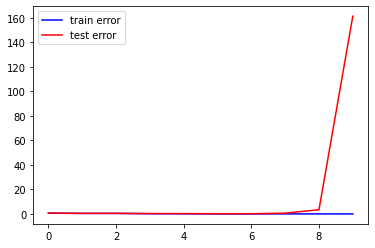

In [60]:
train_errors=[]
test_errors=[]
# print(test_x.shape)
# print(test_y.shape)

for i in range (0,10):
  polynomial_features = PolynomialFeatures(degree = i)
  x_transf=polynomial_features.fit_transform(train_x)
    
  model=LinearRegression()
  model.fit(x_transf,train_y)

  y_new=model.predict(x_transf)

  #training error
  rmse=np.sqrt(mean_squared_error(train_y,y_new))
  #test error
  x_transf=polynomial_features.fit_transform(test_x)
  y_new=model.predict(x_transf)
  rmse2=np.sqrt(mean_squared_error(test_y,y_new))

  train_errors.append(rmse)
  test_errors.append(rmse2)


print(train_errors)
print(test_errors)
models= np.linspace(0, 9, 10)
plt.plot(models,train_errors,label = 'train error', color = 'blue')
plt.plot(models,test_errors,label = 'test error', color = 'red')
plt.legend()
plt.show()




